In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Sentiment Classification Using DistilBERT 

We will use IMDB Movie Reviews Dataset

# What is `BERT`

Bidirectional Encoder Representations from Transformers (BERT) is a technique for NLP (Natural Language Processing) pre-training developed by Google. BERT was created and published in 2018 by Jacob Devlin and his colleagues from Google. Google is leveraging BERT to better understand user searches.

BERT is designed to pretrain deep bidirectional representations from
unlabeled text by jointly conditioning on both
left and right context in all layers. As a result, the pre-trained BERT model can be finetuned with just one additional output layer
to create state-of-the-art models for a wide
range of tasks, such as question answering and
language inference, without substantial taskspecific architecture modifications.

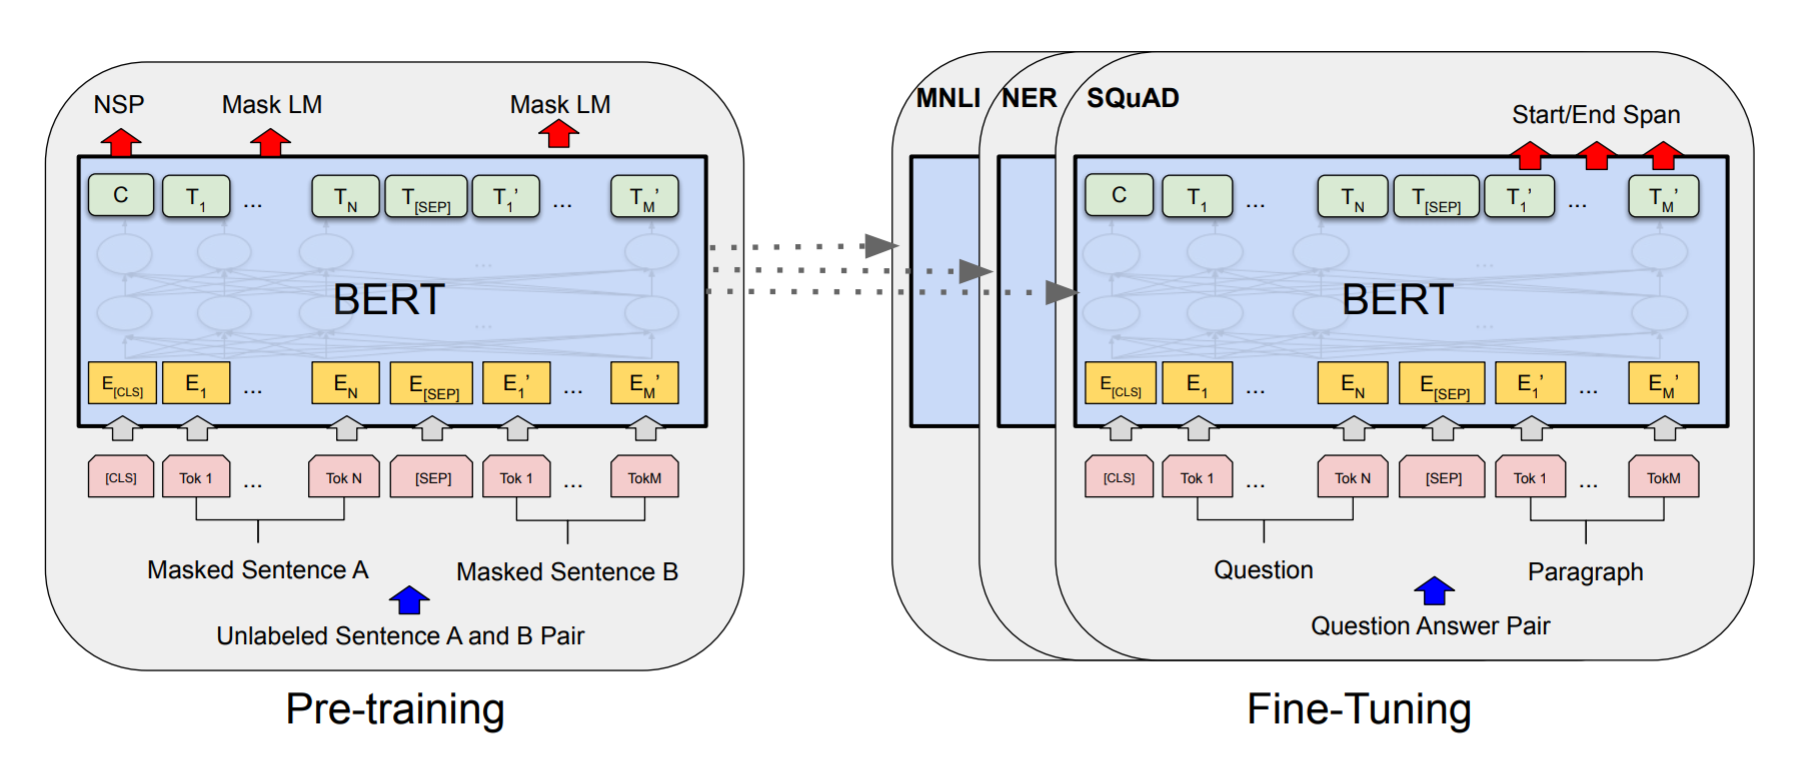

# Why was BERT needed

One of the **biggest challenges** in NLP is the **lack of enough training data**. Overall there is an enormous amount of text data available, but if we want to create task-specific datasets, we need to split that pile into many different fields. As a result, we end up with **only a few thousand** or **a few hundred thousand human-labeled training examples**. 

So, researchers use enormous piles of unannotated text on the web (this is known as **pre-training**). These general purpose pre-trained models can then be **fine-tuned on smaller task-specific datasets**, e.g., when working with problems like question answering and sentiment analysis.

# Example: Sentence Classification

The most straight-forward way to use BERT is to use it to classify a single piece of text. This model would look like this:
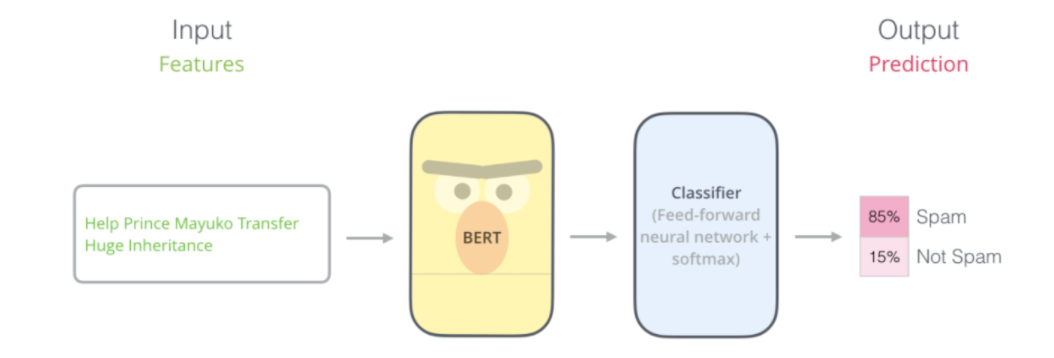

To train such a model, you mainly have to train the classifier, with minimal changes happening to the BERT model during the training phase. This training process is called **Fine-Tuning**.

# What is `DistilBERT`

DistilBERT is a small, fast, cheap and light Transformer model trained by distilling Bert base. It has 40% less parameters than bert-base-uncased, runs 60% faster while preserving over 95% of Bert’s performances as measured on the GLUE language understanding benchmark.

![alt text](https://miro.medium.com/max/2000/1*IFVX74cEe8U5D1GveL1uZA.png)

## Why `DistilBERT`

*   Accurate as much as Original BERT Model
*   60% faster 
*   40% less parameters
*   It can run on CPU

### Additional Reading

DistilBERT, a distilled version of BERT: smaller, faster, cheaper and lighter

https://arxiv.org/abs/1910.01108m

Video Lecture: BERT NLP Tutorial 1- Introduction | BERT Machine Learning | KGP Talkie

https://www.youtube.com/watch?v=h_U27jBNYI4

Ref BERT:  **Pre-training of Deep Bidirectional Transformers for
Language Understanding**

https://arxiv.org/abs/1810.04805

Understanding searches better than ever before:

https://www.blog.google/products/search/search-language-understanding-bert/

Good Resource to Read More About the BERT: 

http://jalammar.github.io/illustrated-bert/

Visual Guide to Using BERT:
 
http://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/

---------------------------------------------------

# What is `ktrain`

ktrain is a lightweight wrapper for the deep learning library TensorFlow Keras (and other libraries) to help build, train, and deploy neural networks and other machine learning models. Inspired by ML framework extensions like fastai and ludwig, it is designed to make deep learning and AI more accessible and easier to apply for both newcomers and experienced practitioners.

ktrain provides support for applying many pre-trained deep learning architectures in the domain of Natural Language Processing and BERT or DistilBert is one of them. To solve this problem, we will be using the implementation of pre-trained DistilBERT provided by ktrain and fine-tune it to classify whether the reviews are positive or negative.

With only a few lines of code, ktrain allows you to easily:

*   Estimate an optimal learning rate for your model given your data using a learning rate finder
*   Employ learning rate schedules such as the triangular learning rate policy, 1cycle policy, and SGDR to more effectively train your model
*   Employ fast and easy-to-use pre-canned models for both text classification (e.g., NBSVM, fastText, GRU with pretrained word embeddings) and image classification (e.g., ResNet, Wide Residual Networks, Inception)
*   Load and preprocess text and image data from a variety of formats

*   Inspect data points that were misclassified to help improve your model
*   Leverage a simple prediction API for saving and deploying both models and data-preprocessing steps to make predictions on new raw data

**Official Documentation:**\
ktrain GitHub: https://github.com/amaiya/ktrain

# Notebook Setup

In [ ]:
# You can download data from here as well
# !git clone https://github.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k.git
!pip install ktrain
!pip install seaborn
!pip install plotly

# 1. Import packages and libraries

In [ ]:
import numpy as np
import ktrain
from ktrain import text
import tensorflow as tf
import pandas as pd

In [ ]:
print(tf.__version__)

2.5.0


# 2. Load data

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/NLP/NLP Assignment/cleaned_IMDB.csv', dtype = str)
df.head()

,review,cleaned_bert_review,cleaned_review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,bromwell high is a cartoon comedy it ran at th...,bromwell high cartoon comedy run time program ...,1
1,Homelessness (or Houselessness as George Carli...,homelessness or houselessness as george carlin...,homelessness houselessness george carlin state...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,brilliant overacting by lesley ann warren best...,brilliant overact lesley ann warren well drama...,1
3,This is easily the most underrated film inn th...,this is easily the most underrated film inn th...,easily underrated film inn brooks cannon sure ...,1
4,This is not the typical Mel Brooks film. It wa...,this is not the typical mel brooks film it was...,not typical mel brooks film much less slapstic...,1


In [ ]:
df["sentiment"] = df["sentiment"].replace("1", "pos")
df["sentiment"] = df["sentiment"].replace("0", "neg")
df.head()

,review,cleaned_bert_review,cleaned_review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,bromwell high is a cartoon comedy it ran at th...,bromwell high cartoon comedy run time program ...,pos
1,Homelessness (or Houselessness as George Carli...,homelessness or houselessness as george carlin...,homelessness houselessness george carlin state...,pos
2,Brilliant over-acting by Lesley Ann Warren. Be...,brilliant overacting by lesley ann warren best...,brilliant overact lesley ann warren well drama...,pos
3,This is easily the most underrated film inn th...,this is easily the most underrated film inn th...,easily underrated film inn brooks cannon sure ...,pos
4,This is not the typical Mel Brooks film. It wa...,this is not the typical mel brooks film it was...,not typical mel brooks film much less slapstic...,pos


## 2.1 Shape of data

In [ ]:
df.shape

(50000, 4)

## 2.2 Balancing of dataset

In [ ]:
# Check the dataset is balanced or not
df.groupby('sentiment')["sentiment"].count()

sentiment
neg    25000
pos    25000
Name: sentiment, dtype: int64

## 2.3 Preview of TOP 25000 dataset balancing 

In [ ]:
# View the top 25000 data
df.head(25000)

,review,cleaned_bert_review,cleaned_review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,bromwell high is a cartoon comedy it ran at th...,bromwell high cartoon comedy run time program ...,pos
1,Homelessness (or Houselessness as George Carli...,homelessness or houselessness as george carlin...,homelessness houselessness george carlin state...,pos
2,Brilliant over-acting by Lesley Ann Warren. Be...,brilliant overacting by lesley ann warren best...,brilliant overact lesley ann warren well drama...,pos
3,This is easily the most underrated film inn th...,this is easily the most underrated film inn th...,easily underrated film inn brooks cannon sure ...,pos
4,This is not the typical Mel Brooks film. It wa...,this is not the typical mel brooks film it was...,not typical mel brooks film much less slapstic...,pos
...,...,...,...,...
24995,"Towards the end of the movie, I felt it was to...",towards the end of the movie i felt it was too...,towards end movie feel technical feel like cla...,neg
24996,This is the kind of movie that my enemies cont...,this is the kind of movie that my enemies cont...,kind movie enemy content watch time not bloody...,neg
24997,I saw 'Descent' last night at the Stockholm Fi...,i saw descent last night at the stockholm film...,see descent last night stockholm film festival...,neg
24998,Some films that you pick up for a pound turn o...,some films that you pick up for a pound turn o...,film pick pound turn rather good 23rd century ...,neg


In [ ]:
df.head(25000).groupby('sentiment')["sentiment"].count()

sentiment
neg    12500
pos    12500
Name: sentiment, dtype: int64

From the above cell, we can see that the **upper half** of the data is **balanced** as well

## 2.4 Preview of BOTTOM 25000 dataset balancing 

In [ ]:
# View the bottom 25000 data
df.tail(25000)

,review,cleaned_bert_review,cleaned_review,sentiment
25000,I went and saw this movie last night after bei...,i went and saw this movie last night after bei...,go see movie last night coax friend mine admit...,pos
25001,Actor turned director Bill Paxton follows up h...,actor turned director bill paxton follows up h...,actor turn director bill paxton follow promise...,pos
25002,As a recreational golfer with some knowledge o...,as a recreational golfer with some knowledge o...,recreational golfer knowledge sport history pl...,pos
25003,"I saw this film in a sneak preview, and it is ...",i saw this film in a sneak preview and it is d...,see film sneak preview delightful cinematograp...,pos
25004,Bill Paxton has taken the true story of the 19...,bill paxton has taken the true story of the 19...,bill paxton take true story 1913 us golf open ...,pos
...,...,...,...,...
49995,I occasionally let my kids watch this garbage ...,i occasionally let my kids watch this garbage ...,occasionally let kid watch garbage understand ...,neg
49996,When all we have anymore is pretty much realit...,when all we have anymore is pretty much realit...,anymore pretty much reality tv show people mak...,neg
49997,The basic genre is a thriller intercut with an...,the basic genre is a thriller intercut with an...,basic genre thriller intercut uncomfortable me...,neg
49998,Four things intrigued me as to this film - fir...,four things intrigued me as to this film firs...,four thing intrigue film firstly star carly po...,neg


In [ ]:
df.tail(25000).groupby('sentiment')["sentiment"].count()

sentiment
neg    12500
pos    12500
Name: sentiment, dtype: int64

From the above cell, we also can see that the **lower half** of the data is **balanced** as well

## 2.5 Split the data (50%)

In [ ]:
df_train = df.head(25000)
df_test = df.tail(25000)

## 2.6 View the train data balancing

In [ ]:
df_train.groupby('sentiment')["sentiment"].count()

sentiment
neg    12500
pos    12500
Name: sentiment, dtype: int64

## 2.7 View the test data balancing

In [ ]:
df_test.groupby('sentiment')["sentiment"].count()

sentiment
neg    12500
pos    12500
Name: sentiment, dtype: int64

# 3. Model building

## 3.1 View the model provided by ktrain

In [ ]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


## 3.2 Preprocess the data (Encodings)

You may need to execute `conda install -c conda-forge ipywidgets` if you run into this error in the **below cell**:

* `ImportError: IProgress not found. Please update jupyter and ipywidgets. See` https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [ ]:
(train, val, preproc) = text.texts_from_df(train_df=df_train, text_column='cleaned_bert_review', label_columns='sentiment', 
                        val_df = df_test,
                        maxlen = 512,
                        preprocess_mode = 'distilbert')

['neg', 'pos']
   neg  pos
0  0.0  1.0
1  0.0  1.0
2  0.0  1.0
3  0.0  1.0
4  0.0  1.0
['neg', 'pos']
       neg  pos
25000  0.0  1.0
25001  0.0  1.0
25002  0.0  1.0
25003  0.0  1.0
25004  0.0  1.0
preprocessing train...
language: en
train sequence lengths:
	mean : 232
	95percentile : 593
	99percentile : 906


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 227
	95percentile : 577
	99percentile : 893


## 3.3 Train a model

In [ ]:
model = text.text_classifier(name = 'distilbert', train_data = train, preproc = preproc)

Is Multi-Label? False
maxlen is 512
done.


In [ ]:
learner = ktrain.get_learner(model = model, train_data = train, val_data = val, batch_size = 6)
learner2 = ktrain.get_learner(model = model, train_data = train, val_data = val, batch_size = 6)
learner3 = ktrain.get_learner(model = model, train_data = train, val_data = val, batch_size = 6)

In [ ]:
# Find out best learning rate BUT it may take days or many days to find out although your GPU or CPU is strong enough.
learner.lr_find(max_epochs = 49)

simulating training for different learning rates... this may take a few moments...
Epoch 1/49
4166/4166 [==============================] - 887s 210ms/step - loss: 0.6603 - accuracy: 0.6824
Epoch 2/49
4166/4166 [==============================] - 878s 211ms/step - loss: 0.4073 - accuracy: 0.8652
Epoch 3/49
4166/4166 [==============================] - 876s 210ms/step - loss: 0.3058 - accuracy: 0.8814
Epoch 4/49
4166/4166 [==============================] - 876s 210ms/step - loss: 0.2761 - accuracy: 0.8891
Epoch 5/49
4166/4166 [==============================] - 877s 210ms/step - loss: 0.2521 - accuracy: 0.9008
Epoch 6/49
4166/4166 [==============================] - 875s 210ms/step - loss: 0.2271 - accuracy: 0.9128
Epoch 7/49
4166/4166 [==============================] - 873s 210ms/step - loss: 0.2049 - accuracy: 0.9217
Epoch 8/49
4166/4166 [==============================] - 868s 208ms/step - loss: 0.1841 - accuracy: 0.9294
Epoch 9/49
4166/4166 [==============================] - 866s 208ms/st

Two possible suggestions for LR from plot:
	Min numerical gradient: 6.53E-07
	Min loss divided by 10: 1.95E-06


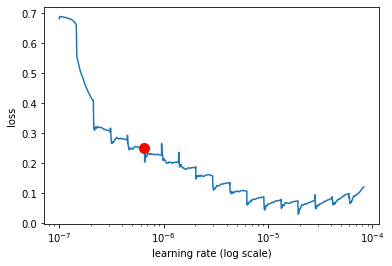

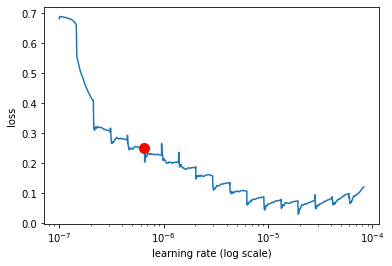

In [ ]:
learner.lr_plot(suggest=True, return_fig=True)

In [ ]:
learner.fit_onecycle(lr=2e-5, epochs=2)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/2
4167/4167 [==============================] - 1114s 265ms/step - loss: 0.2997 - accuracy: 0.8754 - val_loss: 0.2259 - val_accuracy: 0.9104
Epoch 2/2
4167/4167 [==============================] - 1107s 265ms/step - loss: 0.1608 - accuracy: 0.9408 - val_loss: 0.1852 - val_accuracy: 0.9316


In [ ]:
learner2.autofit(lr = 1.28e-05)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 1.28e-05...
Epoch 1/1024
4167/4167 [==============================] - 1110s 266ms/step - loss: 0.0924 - accuracy: 0.9701 - val_loss: 0.2162 - val_accuracy: 0.9270
Epoch 2/1024
4167/4167 [==============================] - 1108s 265ms/step - loss: 0.0545 - accuracy: 0.9831 - val_loss: 0.2573 - val_accuracy: 0.9256
Epoch 3/1024
4167/4167 [==============================] - 1111s 266ms/step - loss: 0.0379 - accuracy: 0.9886 - val_loss: 0.2773 - val_accuracy: 0.9255

Epoch 00003: Reducing Max LR on Plateau: new max lr will be 6.4e-06 (if not early_stopping).
Epoch 4/1024
4167/4167 [==============================] - 1110s 266ms/step - loss: 0.0195 - accuracy: 0.9952 - val_loss: 0.3280 - val_accuracy: 0.9240
Epoch 5/1024
4167/4167 [==============================] - 1112s 266ms/step - loss: 0.0163 - accuracy: 0.9956 - val_

In [ ]:
learner3.autofit(lr = 1.95e-5)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 1.95e-05...
Epoch 1/1024
4167/4167 [==============================] - 1107s 265ms/step - loss: 0.2883 - accuracy: 0.8772 - val_loss: 0.1906 - val_accuracy: 0.9246
Epoch 2/1024
4167/4167 [==============================] - 1104s 264ms/step - loss: 0.1650 - accuracy: 0.9380 - val_loss: 0.1914 - val_accuracy: 0.9292
Epoch 3/1024
4167/4167 [==============================] - 1105s 264ms/step - loss: 0.1017 - accuracy: 0.9655 - val_loss: 0.2164 - val_accuracy: 0.9289

Epoch 00003: Reducing Max LR on Plateau: new max lr will be 9.75e-06 (if not early_stopping).
Epoch 4/1024
4167/4167 [==============================] - 1105s 264ms/step - loss: 0.0517 - accuracy: 0.9840 - val_loss: 0.2468 - val_accuracy: 0.9276
Epoch 5/1024
4167/4167 [==============================] - 1107s 265ms/step - loss: 0.0327 - accuracy: 0.9906 - val

## 3.4 Classification Report
To view and compare the learner results

In [ ]:
# First learner
learner.validate(class_names = preproc.get_classes())

              precision    recall  f1-score   support

         neg       0.93      0.94      0.93     12500
         pos       0.94      0.93      0.93     12500

    accuracy                           0.93     25000
   macro avg       0.93      0.93      0.93     25000
weighted avg       0.93      0.93      0.93     25000



array([[11718,   782],
       [  927, 11573]], dtype=int64)

In [ ]:
# Second learner
learner2.validate(class_names = preproc.get_classes())

              precision    recall  f1-score   support

         neg       0.93      0.92      0.92     12500
         pos       0.92      0.93      0.92     12500

    accuracy                           0.92     25000
   macro avg       0.92      0.92      0.92     25000
weighted avg       0.92      0.92      0.92     25000



array([[11521,   979],
       [  905, 11595]], dtype=int64)

In [ ]:
# Third learner
learner3.validate(class_names = preproc.get_classes())

              precision    recall  f1-score   support

         neg       0.93      0.92      0.92     12500
         pos       0.92      0.93      0.92     12500

    accuracy                           0.92     25000
   macro avg       0.92      0.92      0.92     25000
weighted avg       0.92      0.92      0.92     25000



array([[11521,   979],
       [  905, 11595]], dtype=int64)

## 3.5 Get the predictor
Choose the best learner from **Section 3.4**

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

## 3.6 View the unique values of the labeled data

In [ ]:
preproc.get_classes()

['neg', 'pos']

In [ ]:
predictor.get_classes()

['neg', 'pos']

## 3.6 Do some prediction on random data

In [ ]:
data = ['This movie was really bad. Acting was also bad', 'I will not watch again',
        'The story of this movie quite interesting. I will see it again', 'Another great movie. Everyone must watch']

In [ ]:
predictor.predict(data)

['neg', 'neg', 'pos', 'pos']

In [ ]:
predictor.predict(data, return_proba=True)

array([[0.9908784 , 0.00912159],
       [0.5249666 , 0.47503337],
       [0.02938905, 0.970611  ],
       [0.00699515, 0.99300486]], dtype=float32)

## 3.7 Save the model

In [ ]:
predictor.save('/content/drive/Shareddrives/NLP/NLP Assignment/Lim Ming Jun/Saved_DistilBert_Model')

## 3.8 Load the model

In [ ]:
predictor_load = ktrain.load_predictor('/content/drive/Shareddrives/NLP/NLP Assignment/Lim Ming Jun/Saved_DistilBert_Model')

In [ ]:
# Get classes
predictor_load.get_classes()

['neg', 'pos']

In [ ]:
# Do prediction on the same data again
predictor_load.predict(data)

['neg', 'neg', 'pos', 'pos']

In [ ]:
predictor_load.predict(data, return_proba=True)

array([[0.9908784 , 0.00912159],
       [0.5249666 , 0.47503337],
       [0.02938905, 0.970611  ],
       [0.00699515, 0.99300486]], dtype=float32)

In [ ]:
# See the return type for the predict()
print(type(predictor_load.predict(data)))

<class 'list'>


## 3.9 View the metrics
https://stackoverflow.com/questions/50203106/valueerror-pos-label-1-is-not-a-valid-label-arrayneg-pos-dtype-u3

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_true = df_test['sentiment'].tolist()
y_pred = predictor_load.predict(df_test['cleaned_bert_review'].tolist())

print(f"Accuracy score: {accuracy_score(y_true, y_pred):.2f}")
print(f"Precision score: {precision_score(y_true, y_pred, pos_label='neg'):.2f}")
print(f"Recall score: {recall_score(y_true, y_pred, pos_label='neg'):.2f}")
print("F1 Score: {:.2f}".format(f1_score(y_true,y_pred, pos_label='neg')))

Accuracy score: 0.93
Precision score: 0.93
Recall score: 0.94
F1 Score: 0.93


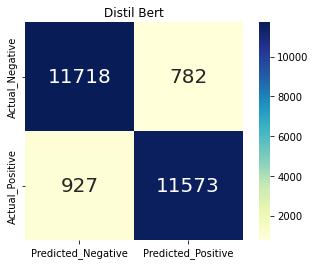

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

distilbert_cm = confusion_matrix(y_true, y_pred)
sns.heatmap(distilbert_cm, xticklabels = ['Predicted_Negative', 'Predicted_Positive'], yticklabels = ['Actual_Negative', 'Actual_Positive'],
            annot = True, fmt = 'd', annot_kws = {'fontsize':20}, cmap="YlGnBu", square = True);

plt.title("Distil Bert")
plt.subplots_adjust(wspace = .3,hspace = .3)

AUC Score: 0.93


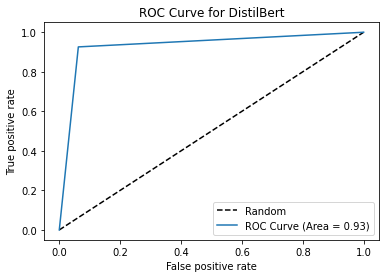

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

y_true_int = pd.Series(y_true).apply(lambda x: 1 if x == 'pos' else 0)
y_pred_int = pd.Series(y_pred).apply(lambda x: 1 if x == 'pos' else 0)

distilbert_auc_score = roc_auc_score(y_true_int, y_pred_int)

print(f'AUC Score: {distilbert_auc_score:.2f}')

fpr, tpr, _ = roc_curve(y_true_int, y_pred_int)
# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--', label = 'Random')
plt.plot(fpr, tpr, label ='ROC Curve (Area = %0.2f)' %distilbert_auc_score)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'ROC Curve for DistilBert')
plt.legend(loc ='best')